# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}

\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}

\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileNames = [
    "ainvert.py",
    "lena.bmp",
    "parrot.bmp"
]

for fileName in fileNames:
    if not os.path.exists(fileName):
        r = requests.get(url + fileName, allow_redirects=True)
        open(fileName, 'wb').write(r.content)

#TODO Do samodzielnej implementacji

from ainvert import A_invert

In [2]:
def show_image(image):
    plt.figure(figsize=(image.shape[0]/100,image.shape[1]/100), dpi=200)
    plt.imshow(image, cmap ="gray")
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()

In [3]:
def bilinear_interpolation(image, scale_height, scale_width, return_stats = False):
    height, width = image.shape

    stats_aritmethic = 0
    stats_memory = 0

    new_height = int(height * scale_height)
    new_width = int(width * scale_width)

    result = np.zeros((new_height, new_width))
    for i in range(new_height):
        for j in range(new_width):
            i_ = min(height - 2, int(i / scale_height))
            j_ = min(width - 2, int(j / scale_width))
            
            A = i_, j_
            B = i_, j_ + 1
            C = i_ + 1, j_ + 1
            D = i_ + 1, j_

            stats_aritmethic += 4

            m1 = np.array([A[0] + 1 - i_, i_ - A[0]])

            m2 = np.array([
                [image[A], image[D]],
                [image[B], image[C]],
            ])

            m3 = np.array([
                [A[1] + 1 - j_],
                [j_ - A[1]],
            ])
            
            stats_memory += 8
            stats_aritmethic += 4

            result[i][j] = m1 @ m2 @ m3

            stats_memory += 4 * 4 * 2
            stats_aritmethic += 4 * 4 * 2

    return result if not return_stats else (result, stats_aritmethic, stats_memory)


In [4]:
def cubic_interpolation(image, scale_height, scale_width, return_stats = False):
    height, width = image.shape

    stats_aritmethic = 0
    stats_memory = 0

    def dx(i, j):
        nonlocal image, stats_memory, stats_aritmethic
        stats_memory += 2
        stats_aritmethic += 1
        return (image[i + 1][j] + image[i - 1][j]) / 2
    
    def dy(i, j):
        nonlocal image, stats_memory, stats_aritmethic
        stats_memory += 2
        stats_aritmethic += 1
        return (image[i][j + 1] + image[i][j - 1]) / 2
    
    def dxy(i, j):
        nonlocal image, stats_memory, stats_aritmethic
        stats_memory += 4
        stats_aritmethic += 1
        return (image[i + 1][j + 1] + image[i - 1][j] + image[i][j - 1] + image[i][j]) / 4

    new_height = int(height * scale_height)
    new_width = int(width * scale_width)

    result = np.zeros((new_height, new_width))
    for i in range(new_height):
        for j in range(new_width):
            i_ = max(1, min(height - 3, int(i / scale_height)))
            j_ = max(1, min(width - 3, int(j / scale_width)))
            
            points = [
                (i_, j_),
                (i_, j_ + 1),
                (i_ + 1, j_ + 1),
                (i_ + 1, j_)
            ]
            values = []
            dxs = []
            dys = []
            dxys = []

            for point in points:
                values.append(image[point])
                dxs.append(dx(point[0], point[1]))
                dys.append(dy(point[0], point[1]))
                dxys.append(dxy(point[0], point[1]))

            x = values + dxs + dys + dxys

            a = (A_invert @ x).reshape((4,4)).T

            x_ = i / scale_height - i // scale_height
            y_ = j / scale_width - j // scale_width

            stats_aritmethic += 2

            xs = np.array([x_ ** pwr for pwr in range(4)])
            ys = np.array([y_ ** pwr for pwr in range(4)]).T
            
            result[i][j] = xs @ a @ ys
            stats_aritmethic += 16 * 16 * 2
            stats_memory += 1 + 16 + 16

    result = result.astype('uint8')
    return result if not return_stats else (result, stats_aritmethic, stats_memory)


In [5]:
image_lena = cv2.imread('lena.bmp')
image_lena = cv2.cvtColor(image_lena, cv2.COLOR_BGR2GRAY)

image_parrot = cv2.imread('parrot.bmp')
image_parrot = cv2.cvtColor(image_parrot, cv2.COLOR_BGR2GRAY)

In [6]:
def compare_interpolations(image, scale_height, scale_width):
    cubic, cubic_arithmetic, cubic_memory = cubic_interpolation(
        image, scale_height, scale_width, return_stats=True
    )
    bilinear, bilinear_arithmetic, bilinear_memory = bilinear_interpolation(
        image, scale_height, scale_width, return_stats=True
    )

    show_image(cubic)
    print("Arithmetic:", cubic_arithmetic)
    print("Memory:", cubic_memory)

    show_image(bilinear)
    print("Arithmetic:", bilinear_arithmetic)
    print("Memory:", bilinear_memory)

    print()
    print("Differences (Cubic vs Bilinear)")
    print("Arithmetic difference:", cubic_arithmetic - bilinear_arithmetic)
    print("Memory references difference:", cubic_memory - bilinear_memory)

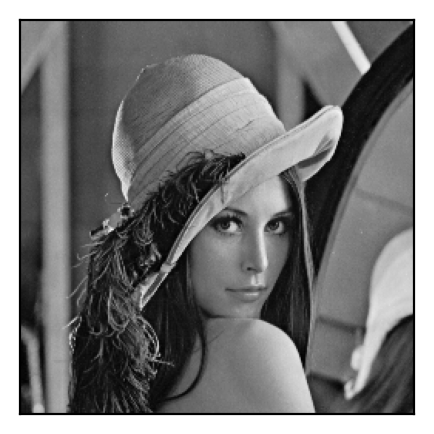

Arithmetic: 34471936
Memory: 4259840


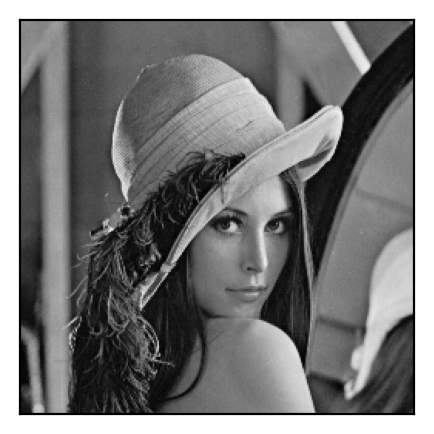

Arithmetic: 2621440
Memory: 2621440

Differences (Cubic vs Bilinear)
Arithmetic difference: 31850496
Memory references difference: 1638400


Arithmetic: 861798400
Memory: 106496000


Arithmetic: 65536000
Memory: 65536000

Differences (Cubic vs Bilinear)
Arithmetic difference: 796262400
Memory references difference: 40960000


In [7]:
compare_interpolations(image_lena, .5, .5)
compare_interpolations(image_lena, 2.5, 2.5)

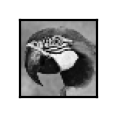

Arithmetic: 1315000
Memory: 162500


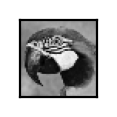

Arithmetic: 100000
Memory: 100000

Differences (Cubic vs Bilinear)
Arithmetic difference: 1215000
Memory references difference: 62500


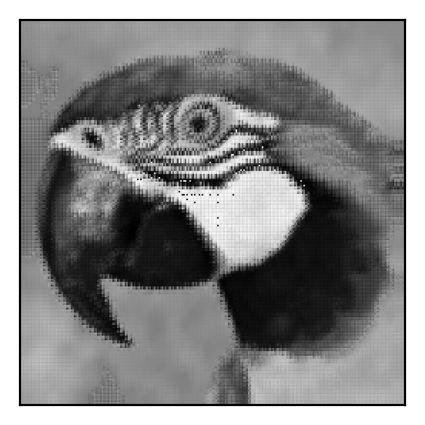

Arithmetic: 32875000
Memory: 4062500


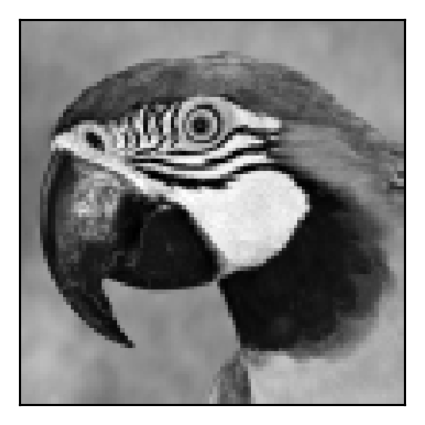

Arithmetic: 2500000
Memory: 2500000

Differences (Cubic vs Bilinear)
Arithmetic difference: 30375000
Memory references difference: 1562500


In [8]:
compare_interpolations(image_parrot, .5, .5)
compare_interpolations(image_parrot, 2.5, 2.5)